#  GRÁFICAS Y DATOS PUESTOS EN EL TFG

In [1]:
import module_Cell as cell
import module_AoiGrids as gr
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline as interp

### GRÁFICAS SPOTS

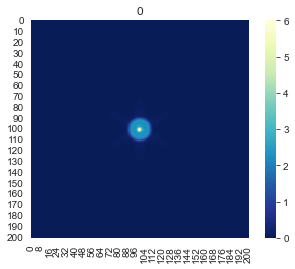

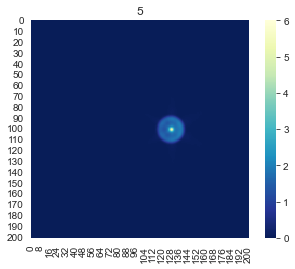

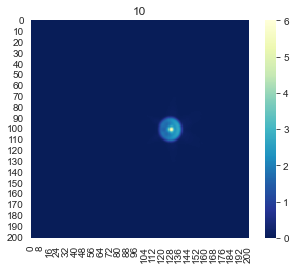

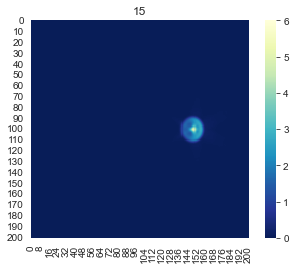

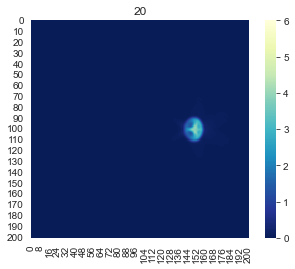

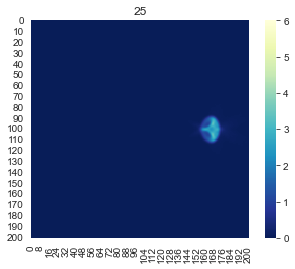

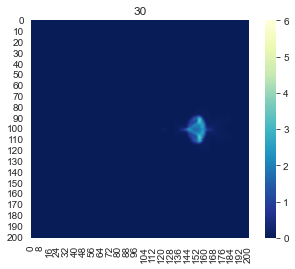

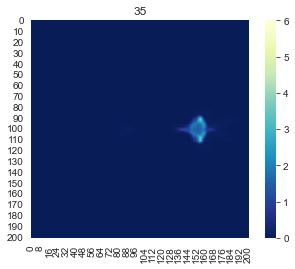

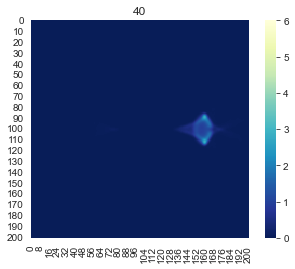

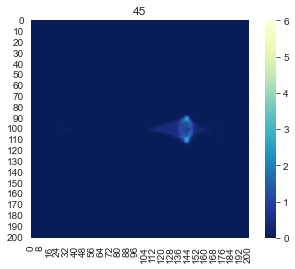

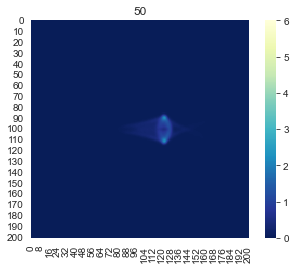

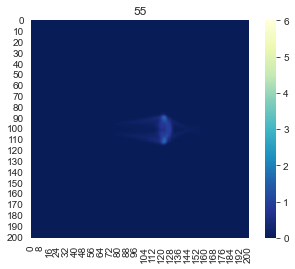

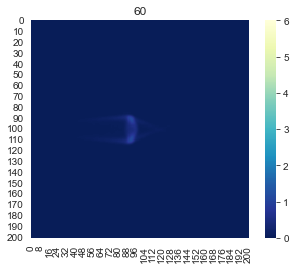

In [2]:
for i in range(0,65,5):
    gr.plot_grid(i,gr.spot_grid(i))

### DEMOSTRACIÓN CREACIÓN CELULA E INTERSECCIÓN

Explicamos el funcionamiento de la función que se va a usar mas adelante 

def irradiance_cell(radio,dy,dx,AOI,directa=1,difusa=0)  

Dado el spot de un aoi, y una celula circular en una posición, va a calcular la irradiancia del área que cae fuera de la célula fotovoltaica. 


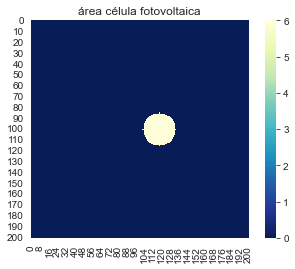

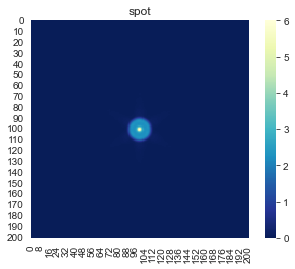

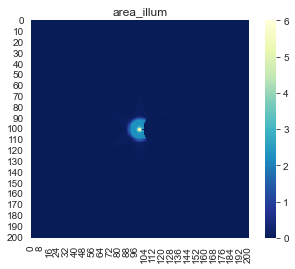

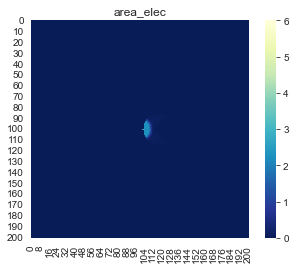

In [3]:
aoi=gr.spot_grid(0)
cell_circular_grid=cell.circular_cell(0.6, 0.7,0)
gr.plot_grid('área célula fotovoltaica',cell_circular_grid)
gr.plot_grid('spot',aoi)
area_illum,area_elect= cell.areas_intersection(aoi,cell_circular_grid)
gr.plot_grid('area_illum',area_illum)
gr.plot_grid('area_elec',area_elect)

### DISTRIBUCIÓN PARA CADA AOI IRRADIANCIA PARA DISTINTOS DESPLAZAMIENTOS DE CELULA

###### Definimos una célula de radio 0.6mm

In [4]:
caracteristics_module={    
    'tilt':0,
    'surface_azimuth':180,
    'radius':0.6,
    'area':179*10**-6
    }

In [5]:
desp=np.arange(-3, 3, 0.01)
f_0,f_5,f_10,f_15,f_20,f_25,f_30,f_35,f_40,f_45,f_50,f_55,f_60=cell.function(desp,caracteristics_module['radius'])

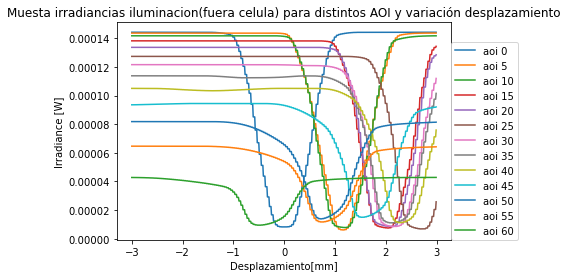

In [6]:
plt.plot(desp,f_0(desp),label='aoi 0')
plt.plot(desp,f_5(desp),label='aoi 5')
plt.plot(desp,f_10(desp),label='aoi 10')
plt.plot(desp,f_15(desp),label='aoi 15')
plt.plot(desp,f_20(desp),label='aoi 20')
plt.plot(desp,f_25(desp),label='aoi 25')
plt.plot(desp,f_30(desp),label='aoi 30')
plt.plot(desp,f_35(desp),label='aoi 35')
plt.plot(desp,f_40(desp),label='aoi 40')
plt.plot(desp,f_45(desp),label='aoi 45')
plt.plot(desp,f_50(desp),label='aoi 50')
plt.plot(desp,f_55(desp),label='aoi 55')
plt.plot(desp,f_60(desp),label='aoi 60')

plt.legend(loc=(1, 0))
plt.xlabel('Desplazamiento[mm]')
plt.ylabel('Irradiance [W]')
plt.title("Muesta irradiancias iluminacion(fuera celula) para distintos AOI y variación desplazamiento")

plt.show()

### FACTOR DE CONCENTRACIÓN

Sabemos que el spot tiene una sueprficie de 1mm2 para el aoi de 0º

In [7]:

fdc=f_0(desp).max()/(1*10**-6)
print("El factor de concentración es:",fdc)

El factor de concentración es: 144.2955293416001


### INTERPOLACIÓN DE DISTINTOS AOI

#### RESULTADO INTERPOLACIÓN DIFERENCIALES DE AREA DEL SPOT: OBTENCIÓN DEL SPOT PARA CADA AOI

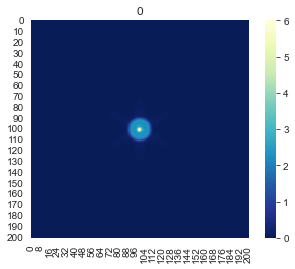

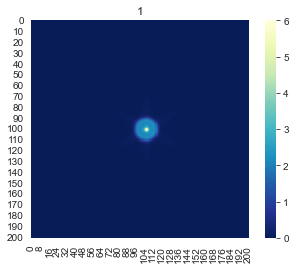

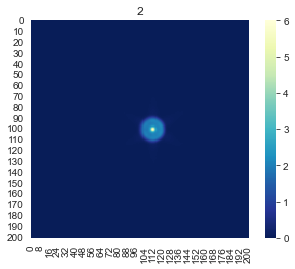

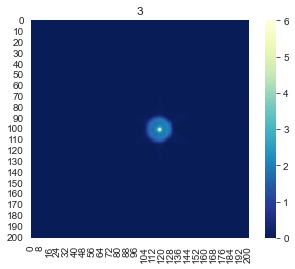

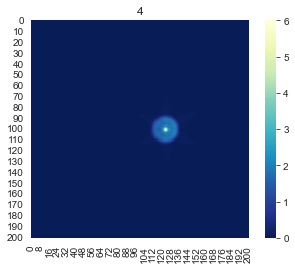

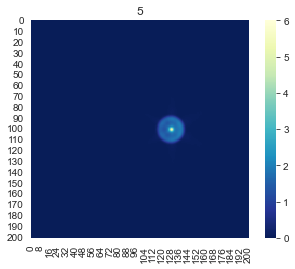

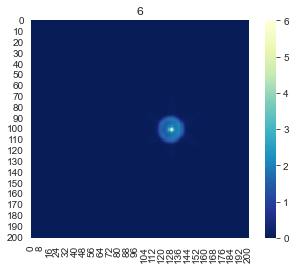

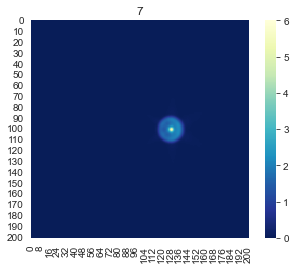

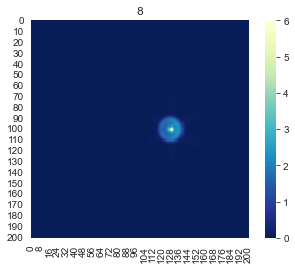

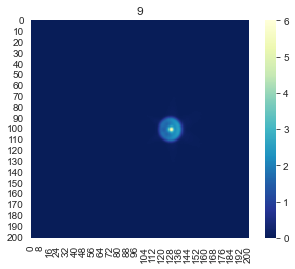

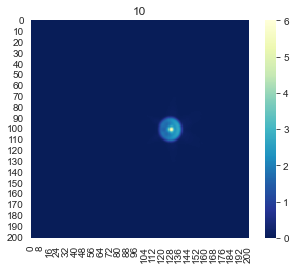

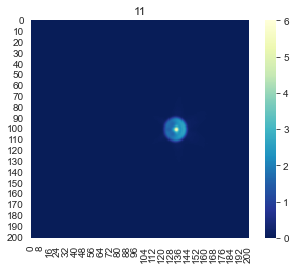

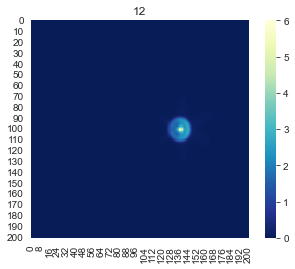

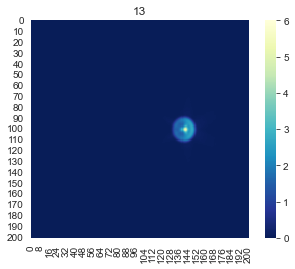

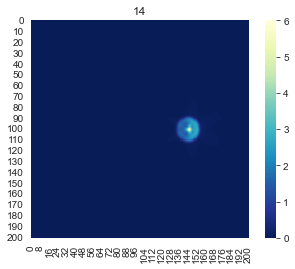

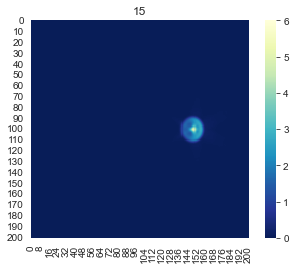

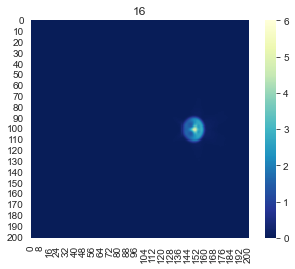

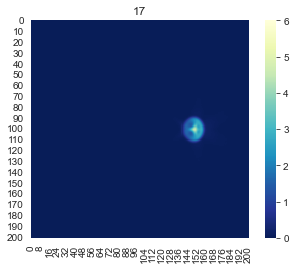

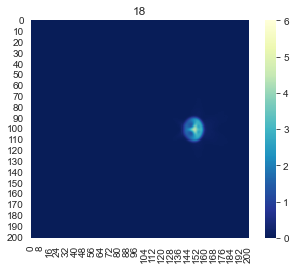

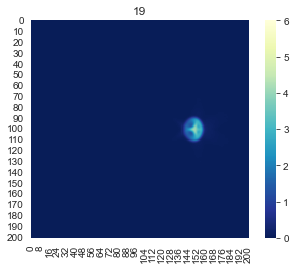

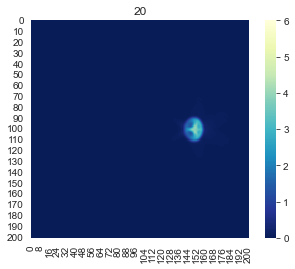

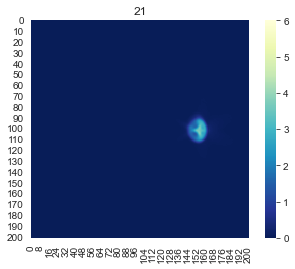

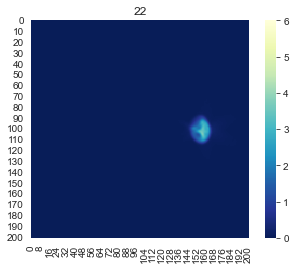

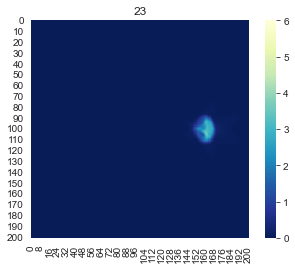

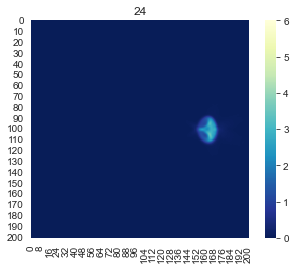

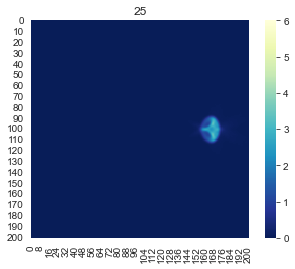

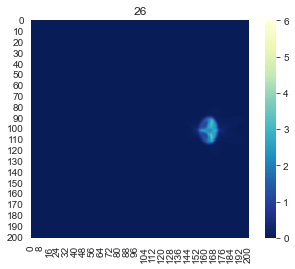

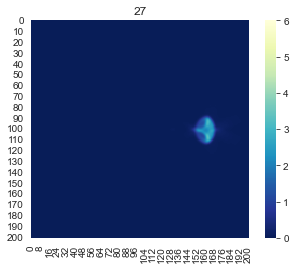

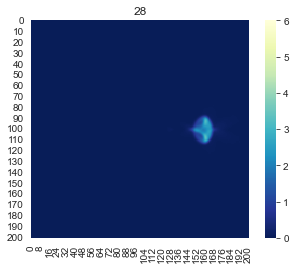

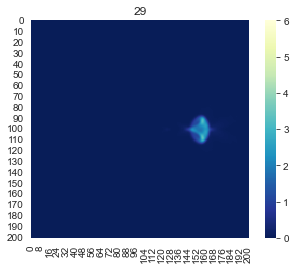

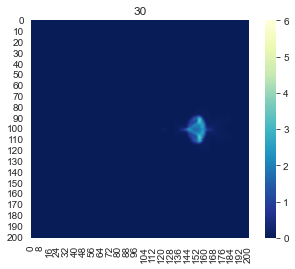

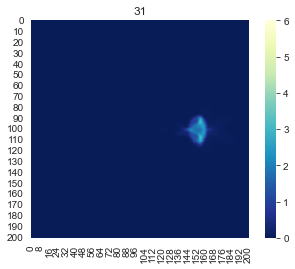

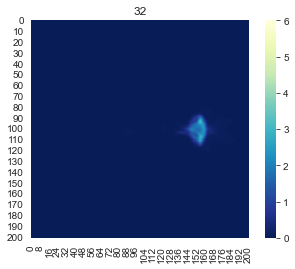

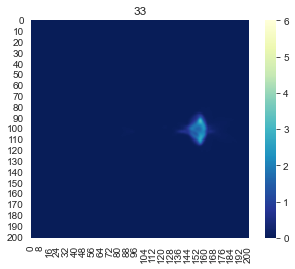

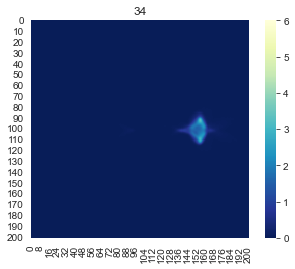

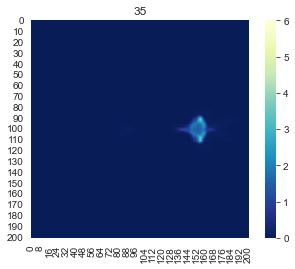

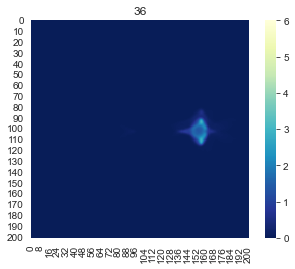

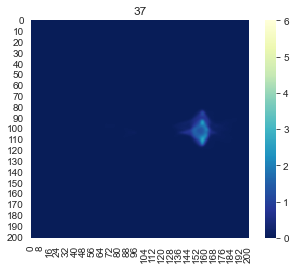

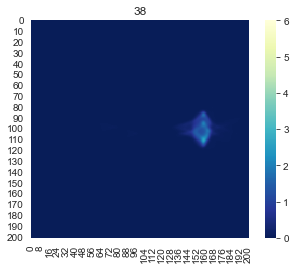

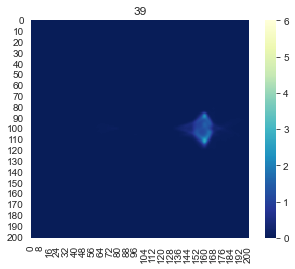

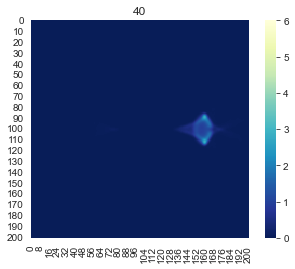

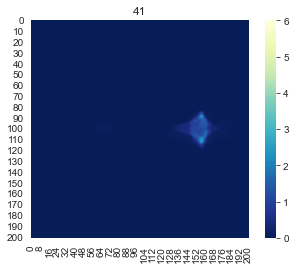

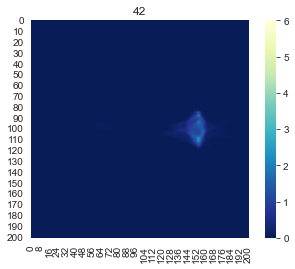

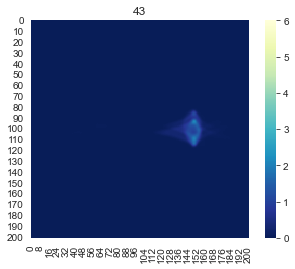

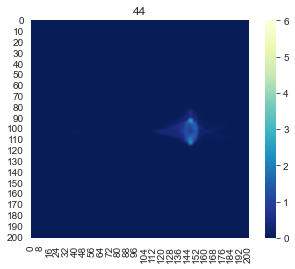

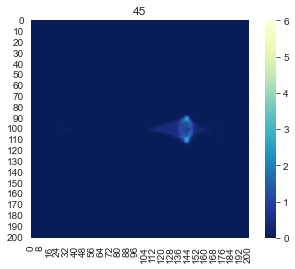

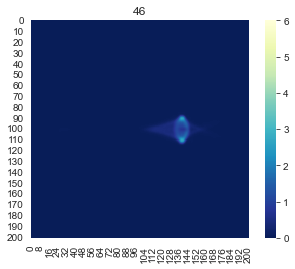

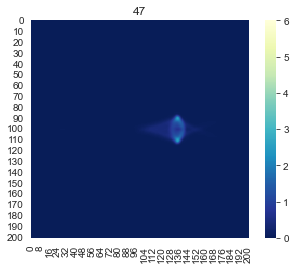

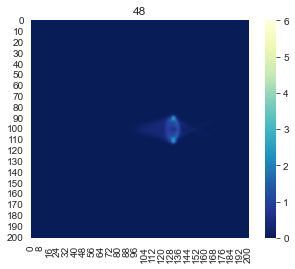

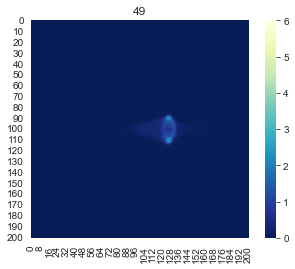

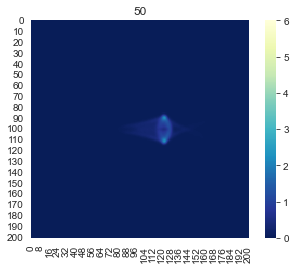

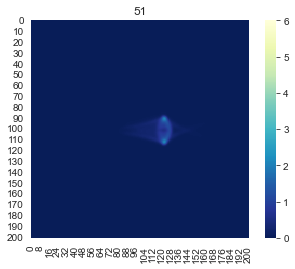

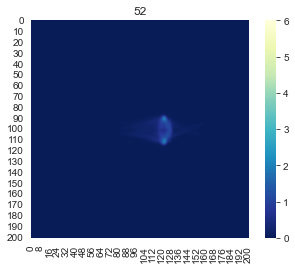

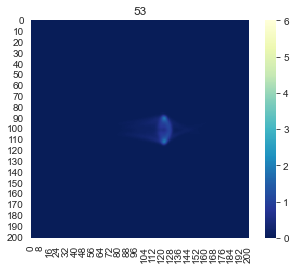

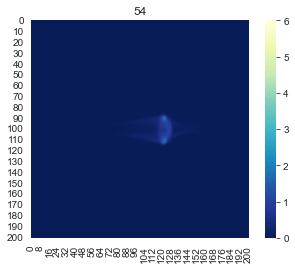

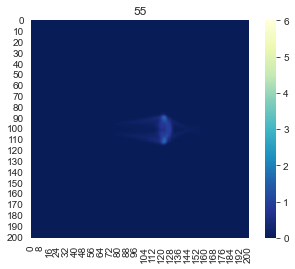

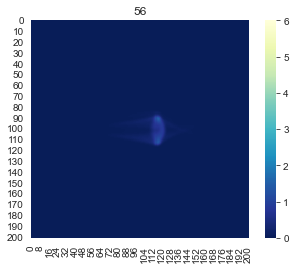

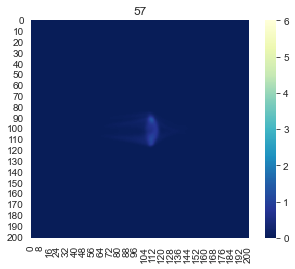

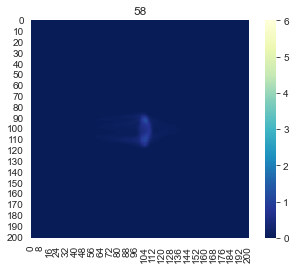

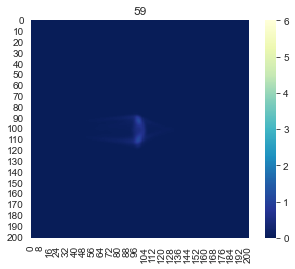

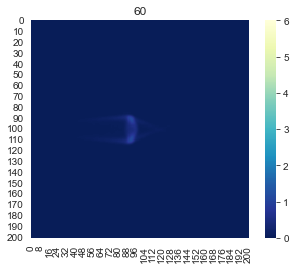

In [8]:
for i in range(0,61,1):
    aoi=gr.spot_grid(i)
    gr.plot_grid(i,aoi)

Para trabajar con ellos bastaría hacer lo mismo que hemos hecho en el anterior. Vamos a ejemplificar el caso de 12º y 47º de ángulo de incidencia, para comprobar ambos métodos

In [ ]:
irradiance_aoi_12=[]
irradiance_aoi_43=[]
irradiance_aoi_47=[]
for i in desp:
    irradiance_aoi_12.append(cell.irradiance_cell(caracteristics_module['radius'], i, 0, 12))
    irradiance_aoi_43.append(cell.irradiance_cell(caracteristics_module['radius'], i, 0, 43))
    irradiance_aoi_47.append(cell.irradiance_cell(caracteristics_module['radius'], i, 0, 47))



In [ ]:
plt.plot(desp,f_10(desp),label='aoi 10')
plt.plot(desp,irradiance_aoi_12,label='aoi 12')
plt.plot(desp,f_15(desp),label='aoi 15')
plt.legend(loc=(1, 0))
plt.xlabel('Desplazamiento[mm]')
plt.ylabel('Irradiance [W/m2]')
plt.title("Muesta irradiancias iluminacion(fuera celula) para distintos AOI y variación desplazamiento")

plt.show()

In [ ]:
plt.plot(desp,f_45(desp),label='aoi 45')
plt.plot(desp,irradiance_aoi_47,label='aoi 47')
plt.plot(desp,f_50(desp),label='aoi 50')
plt.legend(loc=(1, 0))
plt.xlabel('Desplazamiento[mm]')
plt.ylabel('Irradiance [W/m2]')
plt.title("Muesta irradiancias iluminacion(fuera celula) para distintos AOI y variación desplazamiento")

plt.show()

Sacamos aun así, la función para cada ángulo de incidencia

#### RESULTADO INTERPOLACIÓN ENTRE FUNCIONES

In [ ]:
irradiance_aoi_12=[]
irradiance_aoi_43=[]
irradiance_aoi_47=[]
for i in desp:
    irradiance_aoi_12.append(cell.irrad(i,12,f_0,f_5,f_10,f_15,f_20,f_25,f_30,f_35,f_40,f_45,f_50,f_55,f_60))
    irradiance_aoi_43.append(cell.irrad(i,43,f_0,f_5,f_10,f_15,f_20,f_25,f_30,f_35,f_40,f_45,f_50,f_55,f_60))
    irradiance_aoi_47.append(cell.irrad(i,47,f_0,f_5,f_10,f_15,f_20,f_25,f_30,f_35,f_40,f_45,f_50,f_55,f_60))



In [ ]:
plt.plot(desp,f_10(desp),label='aoi 10')
plt.plot(desp,irradiance_aoi_12,label='aoi 12')
plt.plot(desp,f_15(desp),label='aoi 15')
plt.legend(loc=(1, 0))
plt.xlabel('Desplazamiento[mm]')
plt.ylabel('Irradiance [W/m2]')
plt.title("Muesta irradiancias iluminacion(fuera celula) para distintos AOI y variación desplazamiento")

plt.show()

In [ ]:
plt.plot(desp,f_45(desp),label='aoi 45')
plt.plot(desp,irradiance_aoi_47,label='aoi 47')
plt.plot(desp,f_50(desp),label='aoi 50')
plt.legend(loc=(1, 0))
plt.xlabel('Desplazamiento[mm]')
plt.ylabel('Irradiance [W/m2]')
plt.title("Muesta irradiancias iluminacion(fuera celula) para distintos AOI y variación desplazamiento")

plt.show()